# DEX Analysis with Entropy-based Feature Extraction and Histogram-based Classification

In [3]:
# Copyright (C) 2019  Communication Network Security Laboratory, SSU, Seoul

# This program is free software; you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation; either version 2 of the License, or
# (at your option) any later version.

# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.

Note that all information should be extracted before.

SVM Classification Test

Import dependencies

In [4]:
import os
import configparser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
class FeatureModel(object):
    """Model for classification."""

    def __init__(self):
        """Init."""
        from sklearn.feature_extraction.text import CountVectorizer
        from sklearn.feature_extraction.text import TfidfTransformer

        self.count_vect = CountVectorizer()
        self.tfidf_transformer = TfidfTransformer()
        config = configparser.ConfigParser()
        config.read("config")
        self.bytecode_dir = config.get("Data", "Bytecode")

    def train_knn(self, X_train, y_train, X_test, neighbors=4):
        from sklearn.neighbors import KNeighborsClassifier
        knn_model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=neighbors, p=2,
           weights='uniform')
        # knn_model = KNeighborsClassifier(n_neighbors=neighbors)
        knn_model.fit(X_train, y_train)
        y_predicted = knn_model.predict(X_test)
        return y_predicted
    
    def train_svm(self, X_train, y_train, X_test):
        from sklearn import svm
        clf = svm.SVC(gamma='auto')
        clf.fit(X, y)
        y_predicted = clf.predict(X_test)
        return y_predicted
                
    def train_naiveBayes(self, features, labels, test_v):
        """Train with naiveBayes."""
        from sklearn.model_selection import train_test_split
        from sklearn.naive_bayes import MultinomialNB
        X_train, X_test, y_train, y_test = train_test_split(features,
                                                            labels,
                                                            random_state=8586)
        X_train_counts = self.count_vect.fit_transform(X_train)
        X_train_tfidf = self.tfidf_transformer.fit_transform(X_train_counts)
        self.clf = MultinomialNB().fit(X_train_tfidf, y_train)
        return self.clf.predict(self.count_vect.transform([test_v]))
    
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [6]:
config = configparser.ConfigParser()
config.read("config")
bytecode_dir = config.get("Data", "Bytecode") 
total_dir = config.get("Data", "Total") 

all_df = pd.DataFrame()
for f in os.listdir(bytecode_dir):
    if all(x in f for x in ['df_packer']):
        df = pd.read_json(os.path.join(bytecode_dir, f))
        all_df = all_df.append(df)
for f in os.listdir(total_dir):
    if all(x in f for x in ['W64', 'uvs']):
        df = pd.read_json(os.path.join(total_dir, f))
        all_df = all_df.append(df)

packer_df = all_df[all_df['packer'] != "Normal"]
normal_df = all_df[all_df['packer'] == "Normal"]




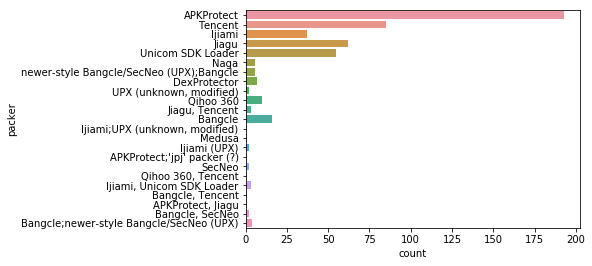

In [7]:
ax = sns.countplot(y="packer", data=packer_df)

In [8]:
print(len(packer_df.index))
print(len(normal_df.index))
packer_df['packer'] = "Packer"
# packer_all['packer'].value_counts()

501
15749


/media/disk3/git_projects/packer_fuzzy/analysis_2/virtual_proj2/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Apply Random Under-sampling

In [9]:
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import preprocessing

def lamda_func(x):
    output = np.zeros(11, dtype=int)
    for i in x:
        test = np.sum([output[i], 1], dtype=int)
        output[i] = test
    return output

def packerization(x):
    if x != "Normal":
        return "Packer"
    return x

# Packerlization and Under-sampling
# Turn all types of Packer name into single name: "Packer"
lb = preprocessing.LabelEncoder()
all_df['packer_label'] = all_df['packer']
all_df['packer_label'] = all_df['packer_label'].apply(packerization)
all_df['packer_label'] = lb.fit_transform(all_df['packer_label'])
all_df['binned'] = all_df['feature'].apply(lamda_func)

# Create X, y
X = all_df['binned']
y = all_df['packer_label']
X = np.array(list(X), dtype=np.int)
y = np.array(list(y), dtype=np.int)

target_count = all_df.packer_label.value_counts()
print('Normal (0):', target_count[0])
print('Packer (1):', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

#normal_subset_df = normal_df.sample(252, random_state=123)
#experiments_df = mj_pack.append(normal_subset_df)
#all_df = experiments_df

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/media/disk3/git_projects/packer_fuzzy/analysis_2/virtual_proj2/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-1b39a19e5cdd>", line 23, in <module>
    all_df['binned'] = all_df['feature'].apply(lamda_func)
  File "/media/disk3/git_projects/packer_fuzzy/analysis_2/virtual_proj2/lib/python3.5/site-packages/pandas/core/series.py", line 2551, in apply
    mapped = lib.map_infer(values, f, convert=convert_dtype)
  File "pandas/_libs/src/inference.pyx", line 1521, in pandas._libs.lib.map_infer
  File "<ipython-input-9-1b39a19e5cdd>", line 8, in lamda_func
    test = np.sum([output[i], 1], dtype=int)
  File "/media/disk3/git_projects/packer_fuzzy/analysis_2/virtual_proj2/lib/python3.5/site-packages/numpy/core/fromnumeric.py", line 1930, in sum
    initial=initial)
  File "/media/disk3/git_projects/packer_fuzzy/analysis_2/virtual_proj

KeyboardInterrupt: 

In [ ]:
# RAndom under-sampling
# Class count
count_class_0, count_class_1 = all_df.packer_label.value_counts()

# Divide by class
df_class_0 = all_df[all_df['packer_label'] == 0]
df_class_1 = all_df[all_df['packer_label'] == 1]

df_class_0_under = df_class_0.sample(count_class_1, random_state=1758)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.packer_label.value_counts(sort=False))

df_test_under.packer_label.value_counts(sort=False).plot(kind='bar', title='Count (target)');

Implementation on SVM Classification Prediction

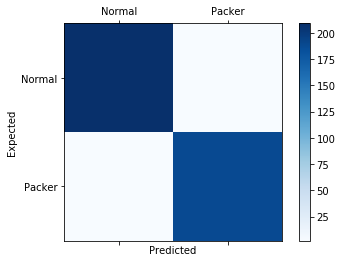

In [25]:
# Create X, y data
X = df_test_under['binned']
y = df_test_under['packer_label']
X = np.array(list(X), dtype=np.int)
y = np.array(list(y), dtype=np.int)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,random_state=8586)
feature_model = FeatureModel()
# Make all df same size
from sklearn.metrics import confusion_matrix

# Make all feature vector same size
y_pred = feature_model.train_svm(X_train, y_train, X_test)
conf_mat = confusion_matrix(y_test,y_pred)

labels = ['Normal', 'Packer']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [26]:
print("0 equals: %s" % lb.inverse_transform([0]))

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

0 equals: ['Normal']


Predicted,0,1,All
True,,,
0,209,2,211
1,2,188,190
All,211,190,401


In [18]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       211
           1       0.77      0.92      0.84       190

   micro avg       0.83      0.83      0.83       401
   macro avg       0.84      0.83      0.83       401
weighted avg       0.84      0.83      0.83       401



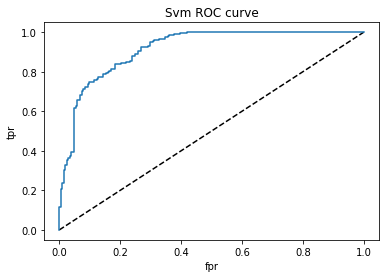

In [11]:
from sklearn import svm
svm_obj = svm.SVC(gamma='scale', probability=True)
svm_obj.fit(X,y)
y_pred_proba = svm_obj.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Svm')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Svm ROC curve')
plt.show()

In [12]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9147221254788794

Cross-Validation

In [13]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
clf.best_score_

0.7243589743589743

In [77]:
clf.best_params_

{'C': 10, 'kernel': 'rbf'}